In [1]:
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
import pickle
import os

plt.rcParams.update({"font.size" : 15, 
                     "figure.dpi" : 100, 
                     "legend.fontsize" : 13, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True, 
                     "figure.figsize":(6, 5)})

### Parameter Grid

- Number of groups
    - 5, 20, 50, 100
- Number of responses per group
    - 10, 25, 50, 100
- Number of questions
    - 4, 6
- Number of answers
    - 3, 4
- m
    - 1 through 10
- k
    - 10 values (linspace) from 1 to N-1 (where N = num_answers ** num_questions)

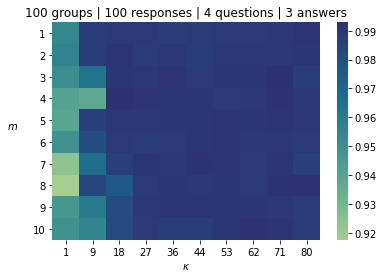

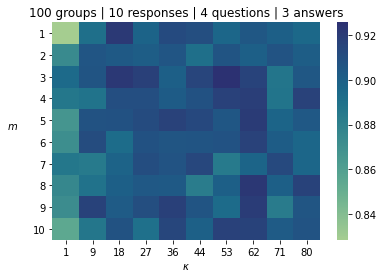

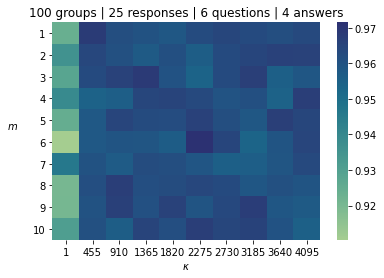

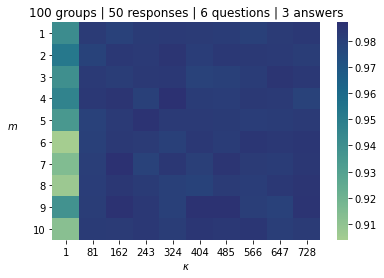

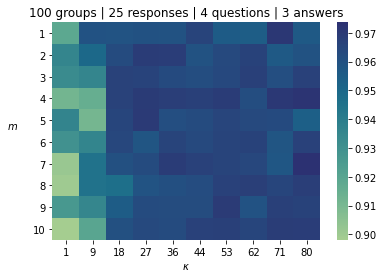

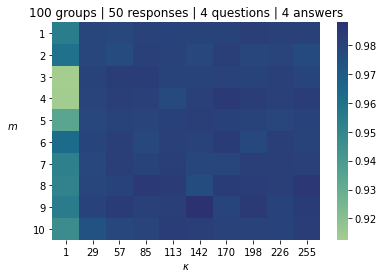

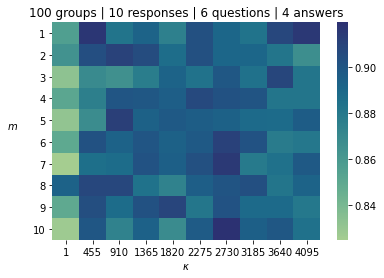

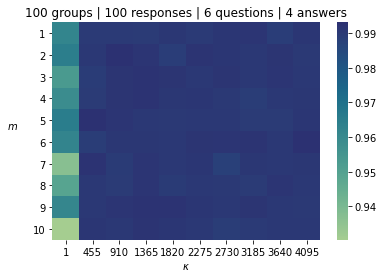

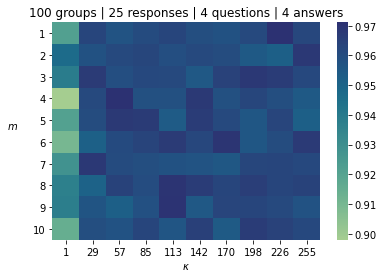

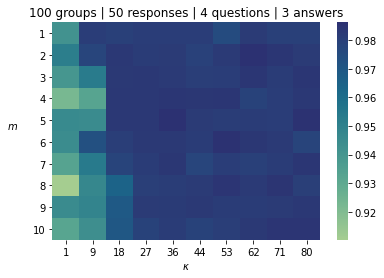

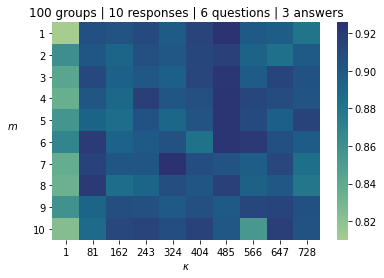

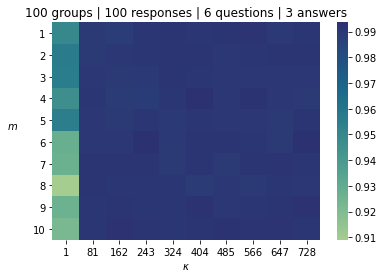

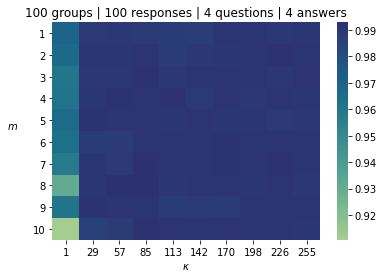

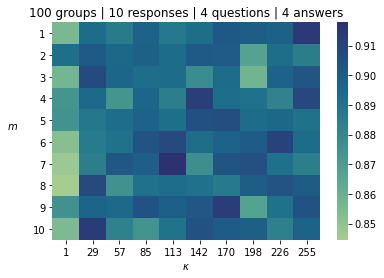

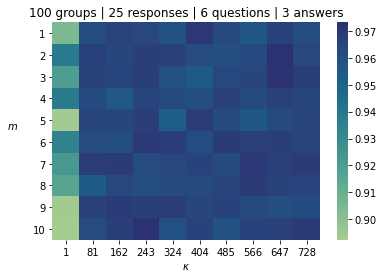

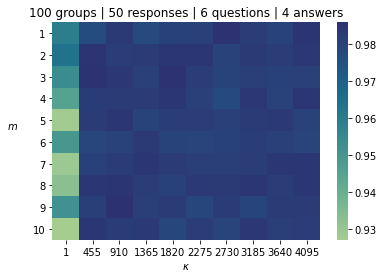

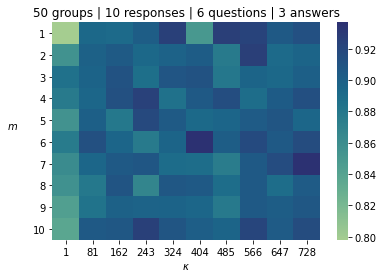

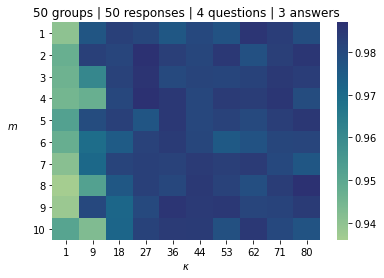

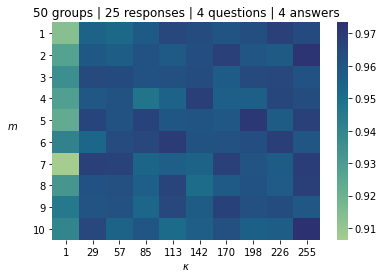

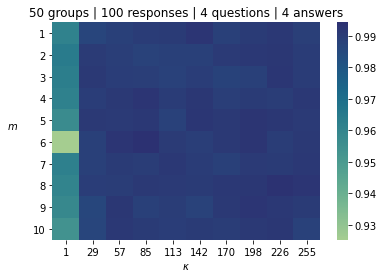

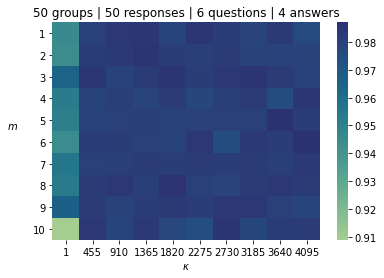

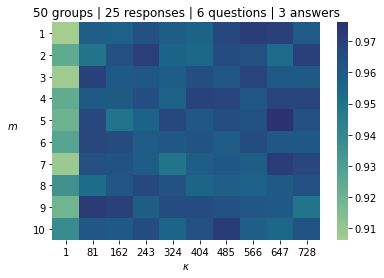

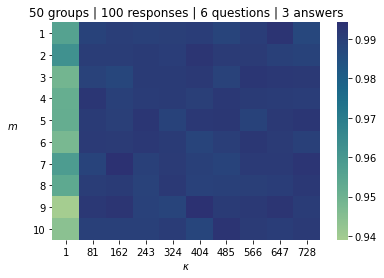

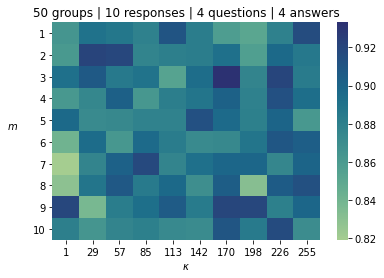

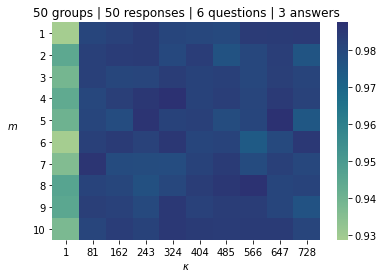

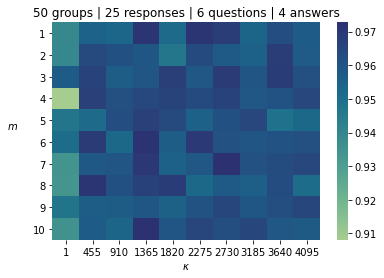

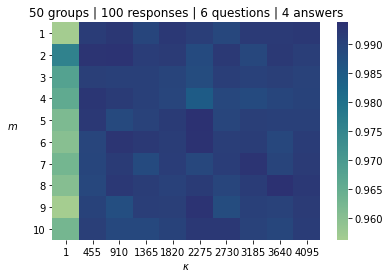

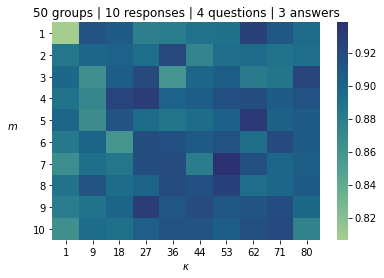

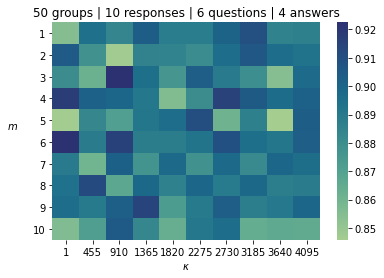

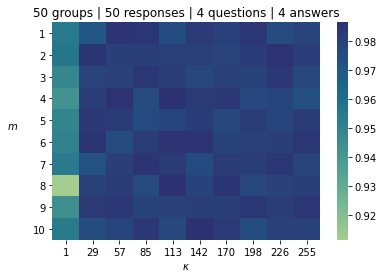

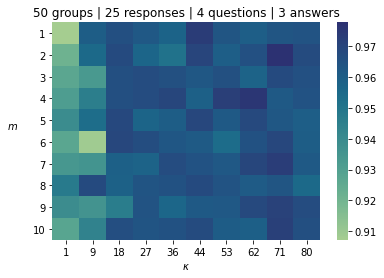

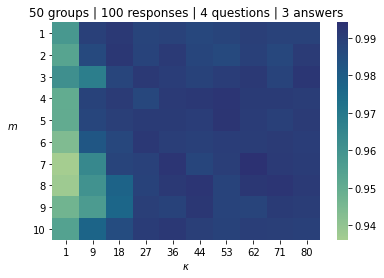

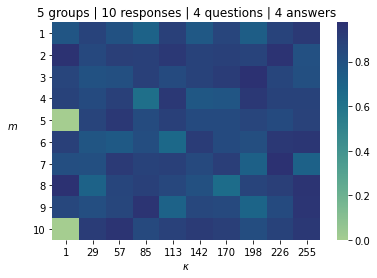

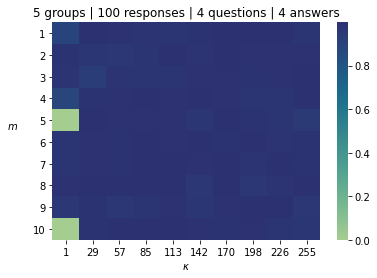

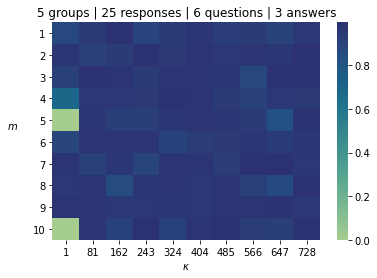

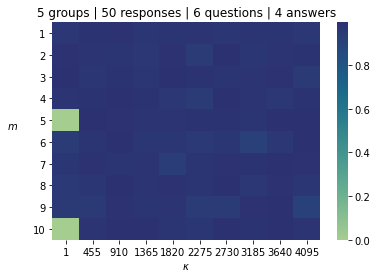

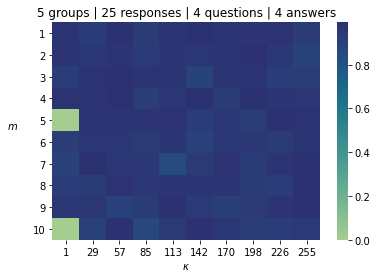

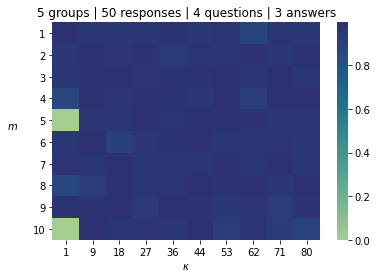

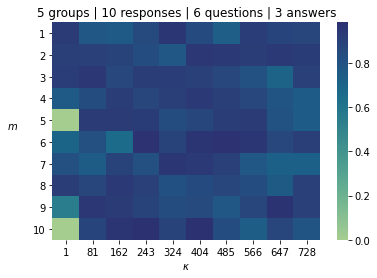

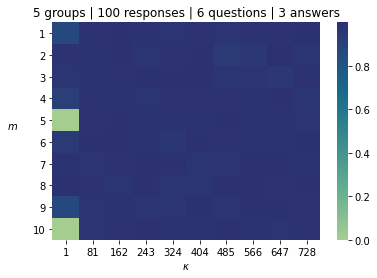

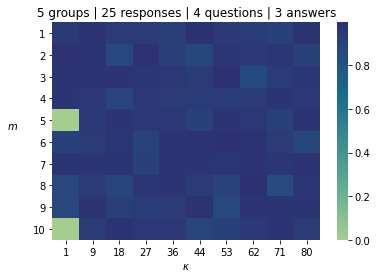

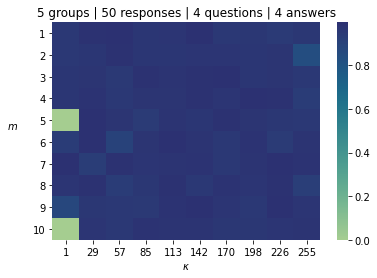

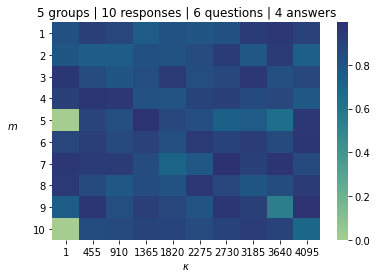

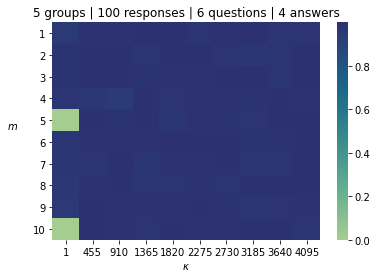

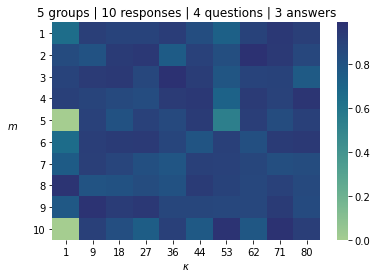

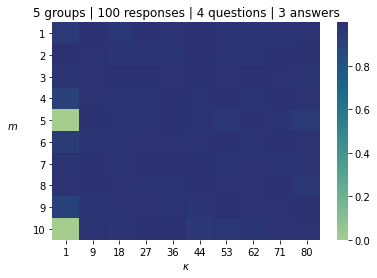

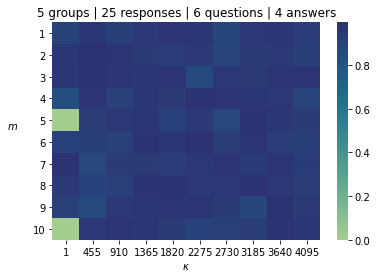

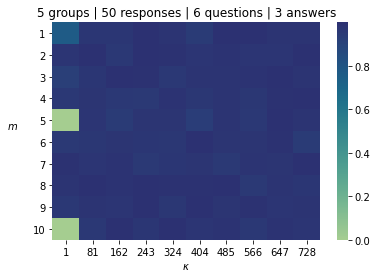

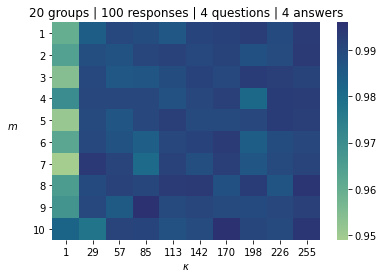

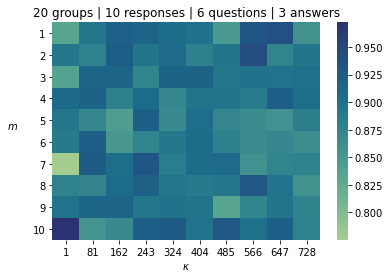

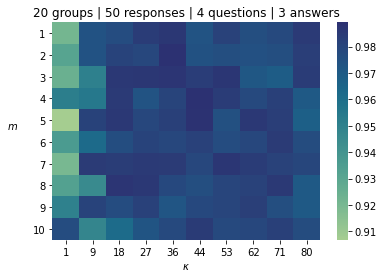

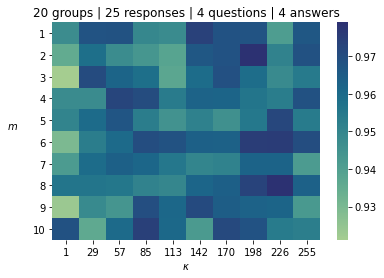

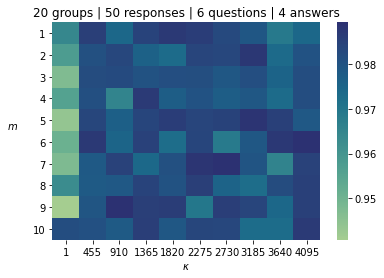

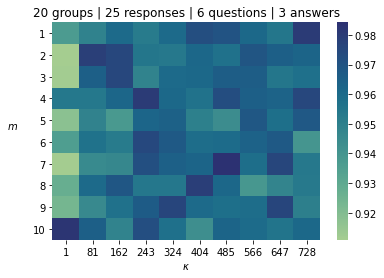

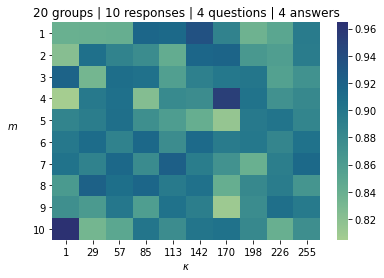

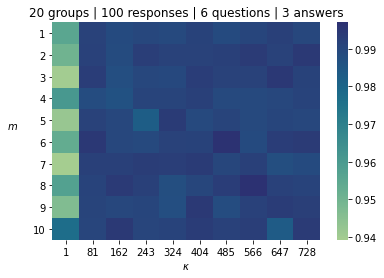

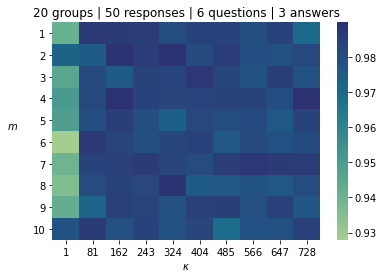

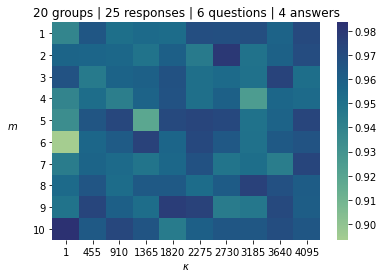

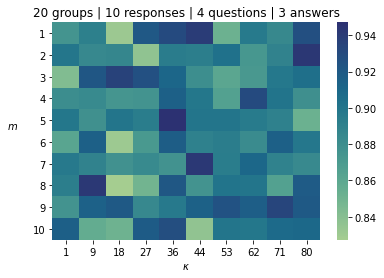

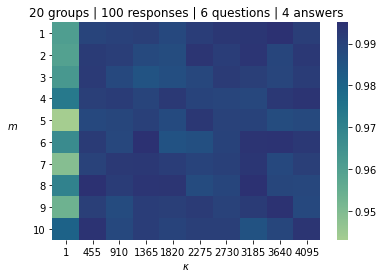

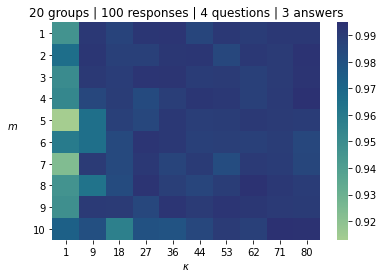

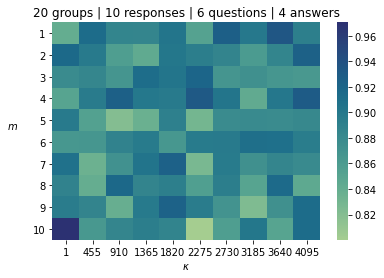

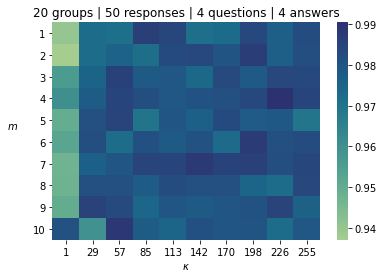

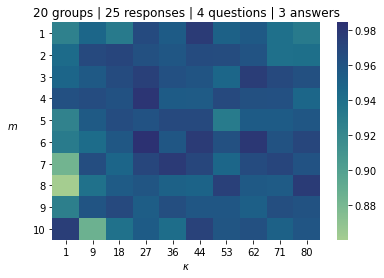

In [2]:
m_vals = np.linspace(1, 10, 10, dtype=int)

for d in [d for d in os.listdir() if "output_dir" in d]:
    for file in os.listdir(d):
        with open(d+"/"+file, "rb") as f:
            correlation = pickle.load(f)
            
        splitted = file.split("_")
        K, num_responses, number_q, number_a = splitted[0], splitted[1], int(splitted[2]), int(splitted[3][0])
      
        k_vals = np.linspace(1, number_a**number_q - 1, 10, dtype=int)
                    
        plt.figure(figsize=(6,4))
        
        ax = sns.heatmap(correlation, xticklabels=k_vals, yticklabels=m_vals, cmap="crest")
        plt.xlabel(r"$\kappa$")
        plt.ylabel(r"$m$", rotation=0, labelpad=20)
        plt.yticks(rotation=0) 
        plt.title(f"{K} groups | {num_responses} responses | {number_q} questions | {number_a} answers")

        plt.show()

# Average impact of number of responses on correlation

In [90]:
# plot num responses vs. avg correlation, collapse everything else
C = {}

for d in [d for d in os.listdir() if "output_dir" in d]:
    for file in os.listdir(d):
        with open(d+"/"+file, "rb") as f:
            correlation = pickle.load(f)
        splitted = file.split("_")
        K, num_responses, number_q, number_a = splitted[0], splitted[1], int(splitted[2]), int(splitted[3][0])
        
        if num_responses not in C:
            C[num_responses] = []
        
        flat = [val for val in correlation.flatten() if val != 0]
        C[num_responses] += flat

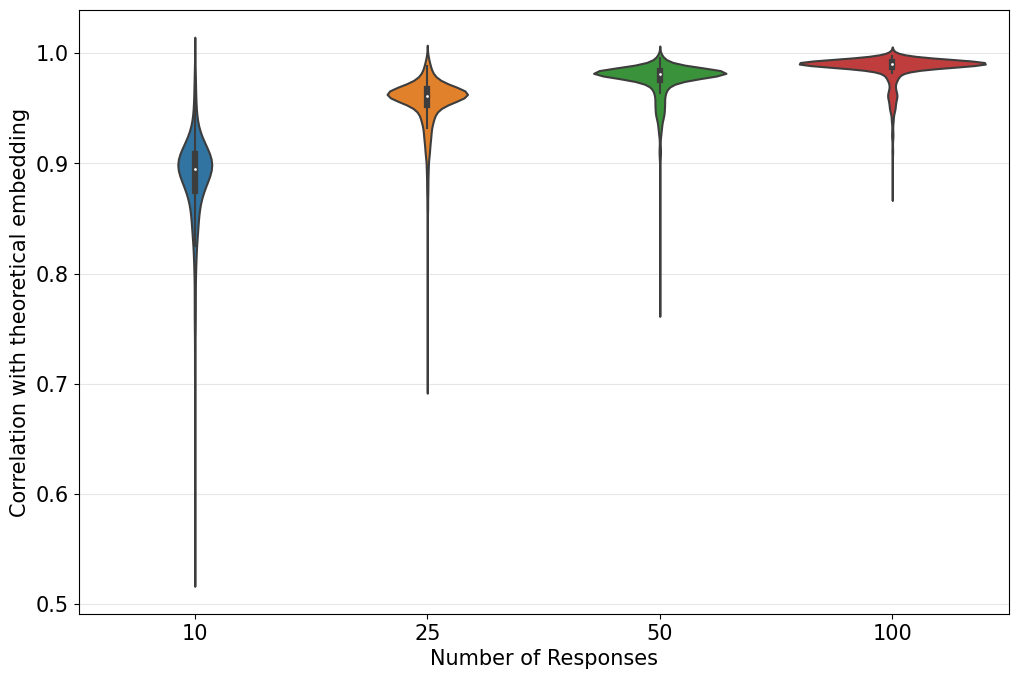

In [91]:
plt.figure(figsize=(12, 8))
stacked = np.array([C["10"], C["25"], C["50"], C["100"]])
plt.xlabel("Number of Responses")
plt.ylabel("Correlation with theoretical embedding")
sns.violinplot(data=stacked.T)
plt.xticks(np.arange(len(C.keys())), sorted([int(x) for x in C.keys()]))
plt.show()

# Average impact of number of groups on correlation

In [92]:
# plot num responses vs. avg correlation, collapse everything else
C = {}

for d in [d for d in os.listdir() if "output_dir" in d]:
    for file in os.listdir(d):
        with open(d+"/"+file, "rb") as f:
            correlation = pickle.load(f)
        splitted = file.split("_")
        K, num_responses, number_q, number_a = splitted[0], splitted[1], int(splitted[2]), int(splitted[3][0])
        
        if K not in C:
            C[K] = []
        
        flat = [val for val in correlation.flatten() if val != 0]
        C[K] += flat

<ipython-input-93-269eca59a57f>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  stacked = np.array([C["5"], C["20"], C["50"], C["100"]])


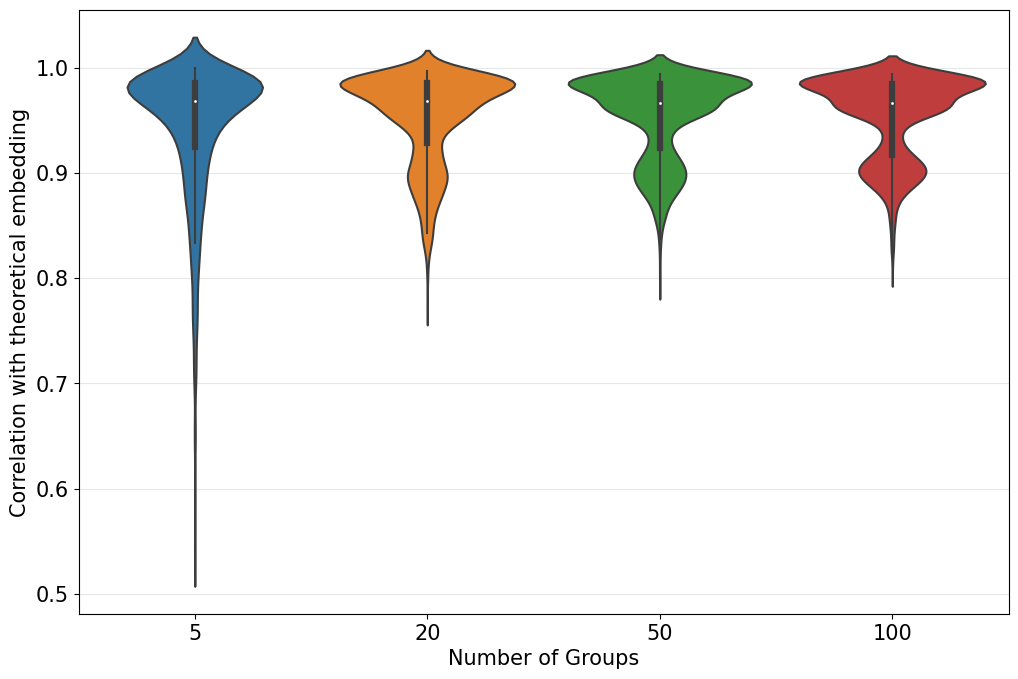

In [93]:
plt.figure(figsize=(12, 8))
stacked = np.array([C["5"], C["20"], C["50"], C["100"]])
plt.xlabel("Number of Groups")
plt.ylabel("Correlation with theoretical embedding")
sns.violinplot(data=stacked.T)
plt.xticks(np.arange(len(C.keys())), sorted([int(x) for x in C.keys()]))
plt.show()

# Average impact of $m$ of groups on correlation

In [94]:
# plot num responses vs. avg correlation, collapse everything else
C = {m:[] for m in m_vals}

for d in [d for d in os.listdir() if "output_dir" in d]:
    for file in os.listdir(d):
        with open(d+"/"+file, "rb") as f:
            correlation = pickle.load(f)
        
        for i in range(len(correlation)):
            vals = [val for val in correlation[i] if val != 0]
            C[m_vals[i]] += vals

<ipython-input-95-e3ecac90db4c>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  stacked = np.array([C[m] for m in m_vals])


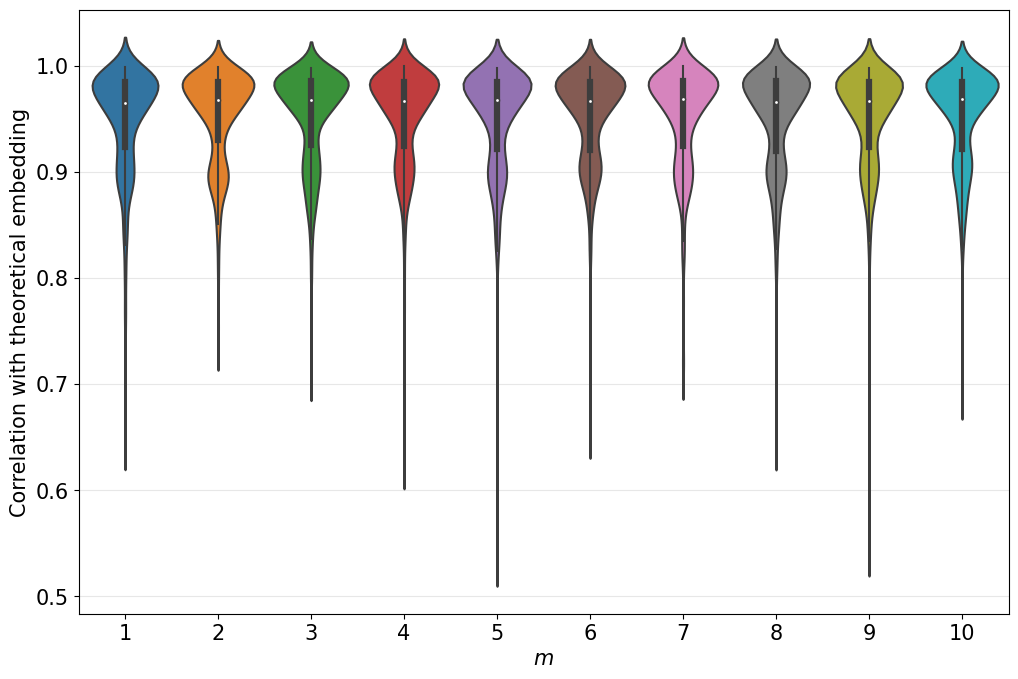

In [95]:
plt.figure(figsize=(12, 8))
stacked = np.array([C[m] for m in m_vals])
plt.xlabel(r"$m$")
plt.ylabel("Correlation with theoretical embedding")
sns.violinplot(data=stacked.T)
plt.xticks(np.arange(len(C.keys())), sorted([int(x) for x in C.keys()]))
plt.show()

# Average impact of $N_Q$ of groups on correlation

In [96]:
# plot num responses vs. avg correlation, collapse everything else
C = {}

for d in [d for d in os.listdir() if "output_dir" in d]:
    for file in os.listdir(d):
        with open(d+"/"+file, "rb") as f:
            correlation = pickle.load(f)
        splitted = file.split("_")
        K, num_responses, number_q, number_a = splitted[0], splitted[1], int(splitted[2]), int(splitted[3][0])
        
        if number_q not in C:
            C[number_q] = []
        
        flat = [val for val in correlation.flatten() if val != 0]
        C[number_q] += flat

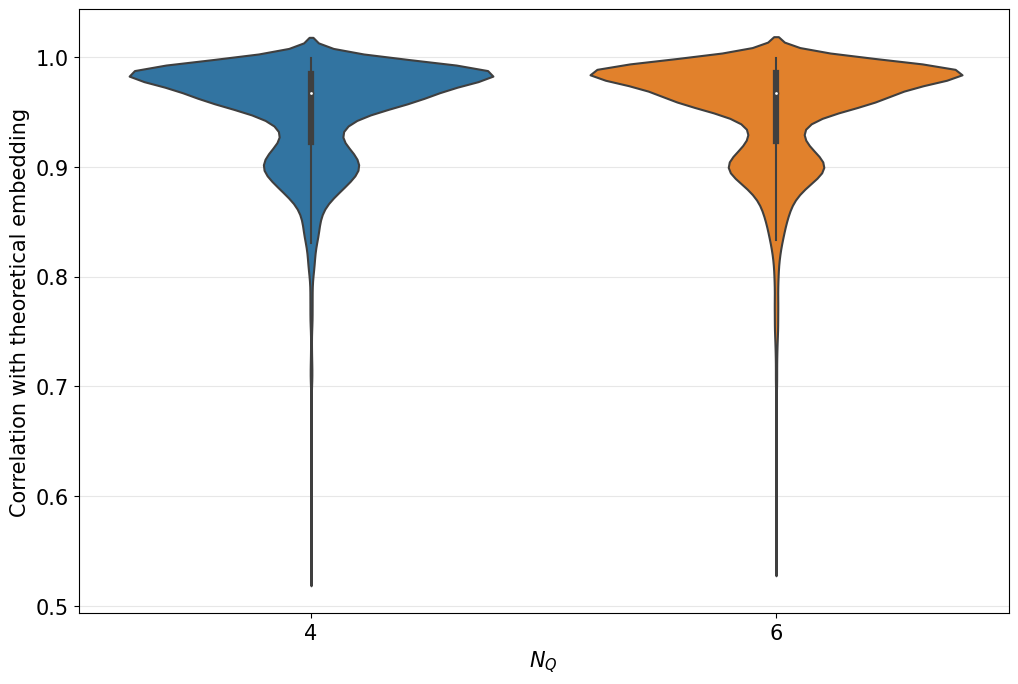

In [101]:
plt.figure(figsize=(12, 8))
stacked = np.array([C[m] for m in [4,6]])
plt.xlabel(r"$N_Q$")
plt.ylabel("Correlation with theoretical embedding")
sns.violinplot(data=stacked.T)
plt.xticks(np.arange(len(C.keys())), sorted([int(x) for x in C.keys()]))
plt.show()

# Average impact of $N_A$ of groups on correlation

In [102]:
# plot num responses vs. avg correlation, collapse everything else
C = {}

for d in [d for d in os.listdir() if "output_dir" in d]:
    for file in os.listdir(d):
        with open(d+"/"+file, "rb") as f:
            correlation = pickle.load(f)
        splitted = file.split("_")
        K, num_responses, number_q, number_a = splitted[0], splitted[1], int(splitted[2]), int(splitted[3][0])
        
        if number_a not in C:
            C[number_a] = []
        
        flat = [val for val in correlation.flatten() if val != 0]
        C[number_a] += flat

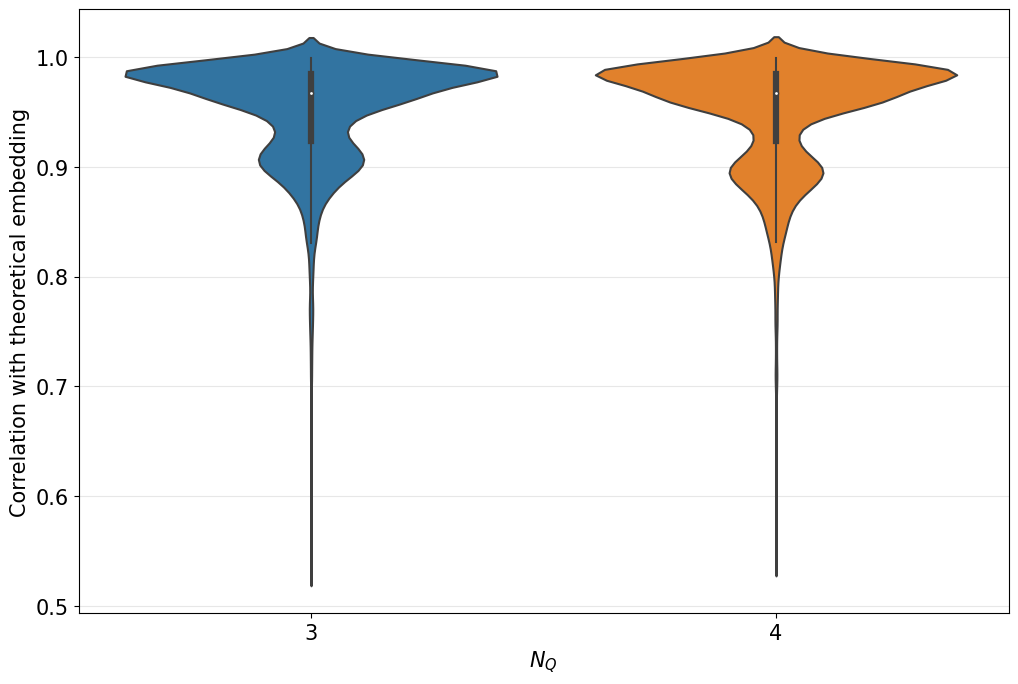

In [105]:
plt.figure(figsize=(12, 8))
stacked = np.array([C[m] for m in [3,4]])
plt.xlabel(r"$N_Q$")
plt.ylabel("Correlation with theoretical embedding")
sns.violinplot(data=stacked.T)
plt.xticks(np.arange(len(C.keys())), sorted([int(x) for x in C.keys()]))
plt.show()